In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("C:\\Users\\KIIT\\Downloads\\archive (1)\\exams.csv")

In [131]:
df

,gender,math score,reading score,writing score
0,female,59,70,78
1,male,96,93,87
2,female,57,76,77
3,male,70,70,63
4,female,83,85,86
...,...,...,...,...
195,male,57,63,54
196,male,82,89,86
197,female,53,61,59
198,female,89,98,99


In [59]:
df = df.drop(columns=["race/ethnicity","parental level of education","lunch"],axis=1)

In [60]:
df

,gender,test preparation course,math score,reading score,writing score
0,female,completed,59,70,78
1,male,none,96,93,87
2,female,none,57,76,77
3,male,none,70,70,63
4,female,none,83,85,86
...,...,...,...,...,...
995,male,none,77,77,71
996,male,none,80,66,66
997,female,completed,67,86,86
998,male,none,80,72,62


In [61]:
df = df.drop(columns=("test preparation course"),axis=1)

In [62]:
df

,gender,math score,reading score,writing score
0,female,59,70,78
1,male,96,93,87
2,female,57,76,77
3,male,70,70,63
4,female,83,85,86
...,...,...,...,...
995,male,77,77,71
996,male,80,66,66
997,female,67,86,86
998,male,80,72,62


In [63]:
df.isnull().sum()

gender           0
math score       0
reading score    0
writing score    0
dtype: int64

In [64]:
x=df.iloc[:,:3]

In [65]:
y=df.iloc[:,3]

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1000, 3)
(700, 3)
(300, 3)


In [67]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,handle_unknown="ignore")
x_train_gender=ohe.fit_transform(x_train[["gender"]])
x_test_gender=ohe.transform(x_test[["gender"]])

In [68]:
x_train_other=x_train.iloc[:,1:]

In [69]:
x_test_other=x_test.iloc[:,1:]

In [70]:
x_train_transformed=np.concatenate((x_train_gender,x_train_other),axis=1)
x_test_transformed=np.concatenate((x_test_gender,x_test_other),axis=1)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [72]:
model=LinearRegression()

In [73]:
model.fit(x_train_transformed,y_train)

LinearRegression()

In [74]:
y_pred=model.predict(x_test_transformed)

In [132]:
y_pred

array([72.76507429, 76.11884232, 55.10846018, 43.0595399 , 76.21445801,
       66.30549142, 63.57228457, 81.98133516, 63.00250256, 76.48761344,
       90.29492783, 89.2420279 , 71.66350098, 54.25657115, 76.85849034,
       65.47707354, 63.98115217, 70.84576577, 50.84134126, 56.2100335 ,
       76.0915343 , 49.8392205 , 76.24176603, 44.40906641, 76.32669903,
       59.86042811, 65.76091165, 56.40720752, 78.98565557, 90.39438039,
       67.81593234, 50.30954996, 65.27989952, 77.18242494, 84.43243499,
       46.23960506, 50.15931823, 80.75473236, 76.30322788, 74.1995338 ,
       57.91764844, 65.92393184, 73.14663388, 57.46010745, 74.71853665,
       81.73338197, 66.69088788, 68.60635953, 58.99401952, 54.49173587,
       67.58076762, 49.13372632, 46.83285822, 66.75234973, 57.32439528,
       67.11043816, 86.70599507, 89.05764234, 95.13182876, 45.17602245,
       73.91358991, 94.93465474, 75.30110712, 74.91571067, 76.44962274,
       84.03425007, 85.51948875, 75.08941354, 57.08923056, 70.64

In [76]:
mae=mean_absolute_error(y_pred,y_test)

In [77]:
mae

3.591291777726327

In [78]:
mse=mean_squared_error(y_pred,y_test)

In [79]:
mse

20.333472287512535

In [80]:
test_input=[[0,1,80,90]]

In [81]:
model.predict(test_input)

array([84.33087665])

### DATA VISUALIZATION

In [82]:
df.dtypes

gender           object
math score        int64
reading score     int64
writing score     int64
dtype: object

In [92]:
df=df.head(200)
df

,gender,math score,reading score,writing score
0,female,59,70,78
1,male,96,93,87
2,female,57,76,77
3,male,70,70,63
4,female,83,85,86
...,...,...,...,...
195,male,57,63,54
196,male,82,89,86
197,female,53,61,59
198,female,89,98,99


In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### SCATTER PLOT

<function matplotlib.pyplot.show(close=None, block=None)>

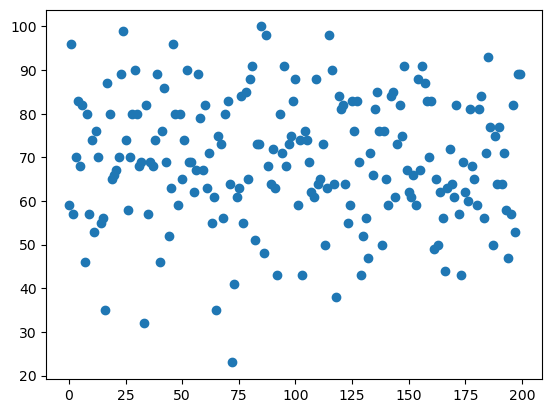

In [93]:
plt.scatter(df.index,df['math score'])
plt.show

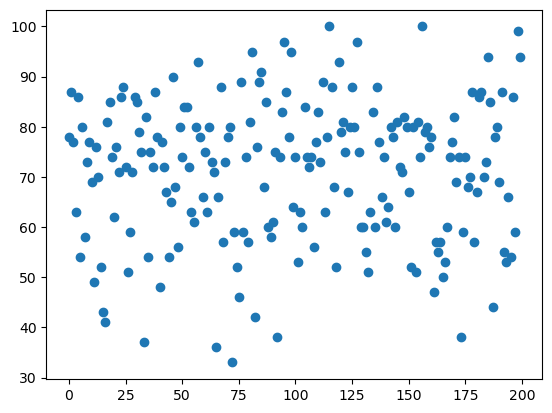

In [94]:
plt.scatter(df.index,df['writing score'])
plt.show()

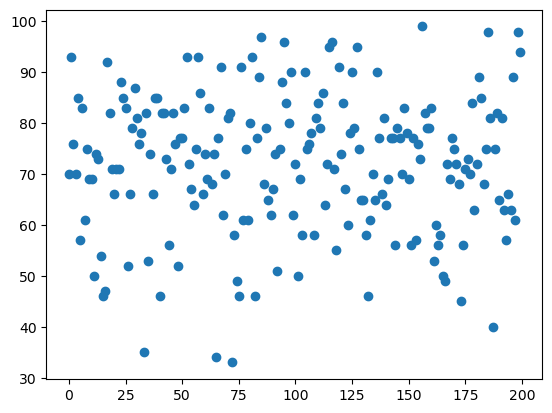

In [95]:
plt.scatter(df.index,df['reading score'])
plt.show()

<AxesSubplot:ylabel='math score'>

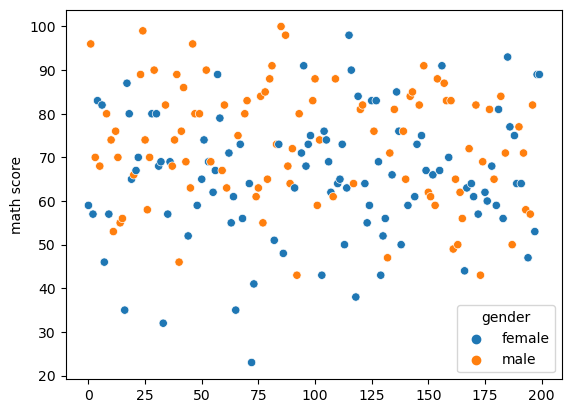

In [96]:
sns.scatterplot(x=df.index,y=df['math score'],hue = df['gender'])

<AxesSubplot:ylabel='reading score'>

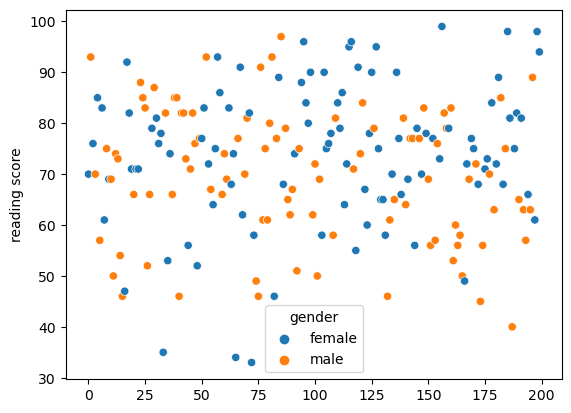

In [105]:
sns.scatterplot(x=df.index,y=df['reading score'],hue=df['gender'])

<AxesSubplot:ylabel='writing score'>

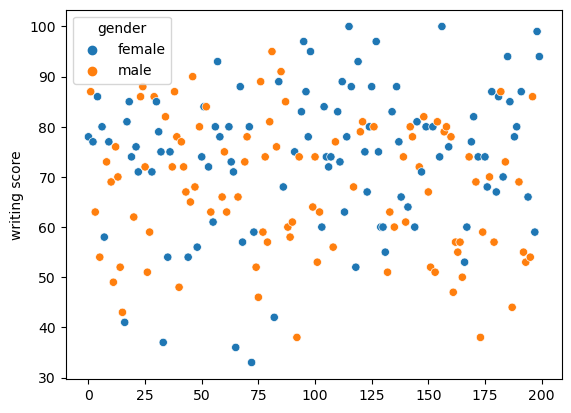

In [106]:
sns.scatterplot(x=df.index,y=df['writing score'],hue=df['gender'])

### LINE PLOT

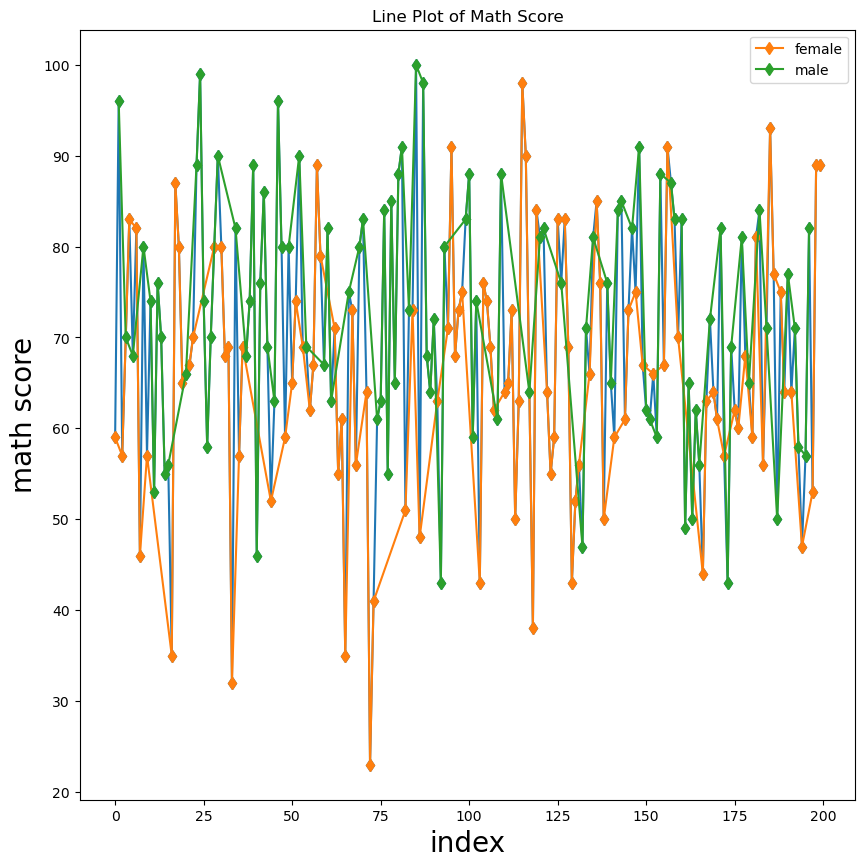

In [98]:
plt.figure(figsize = (10,10))
plt.title('Line Plot of Math Score')
plt.xlabel('index',fontsize=20)
plt.ylabel('math score',fontsize=20)
plt.plot(df.index,df['math score'],markevery=1,marker='d')
for name,group in df.groupby('gender'):
    plt.plot(group.index,group['math score'],label=name,markevery=1,marker='d')
plt.legend()
plt.show()

#### STRIP PLOT

<AxesSubplot:xlabel='gender', ylabel='math score'>

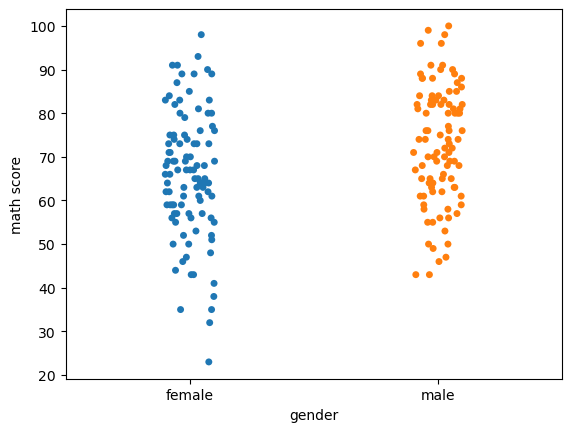

In [101]:
sns.stripplot(x=df['gender'],y=df['math score'])

<AxesSubplot:xlabel='gender', ylabel='reading score'>

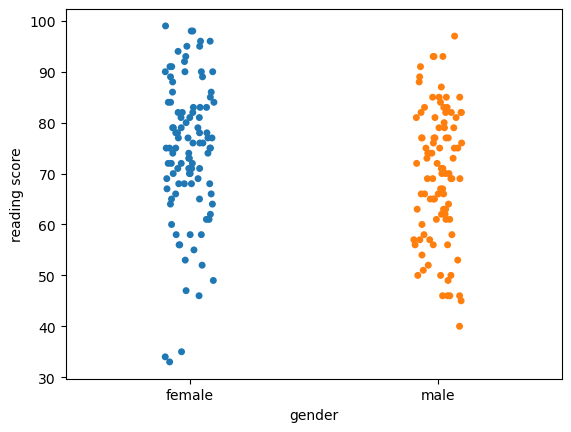

In [102]:
sns.stripplot(x=df['gender'],y=df['reading score'])

<AxesSubplot:xlabel='gender', ylabel='writing score'>

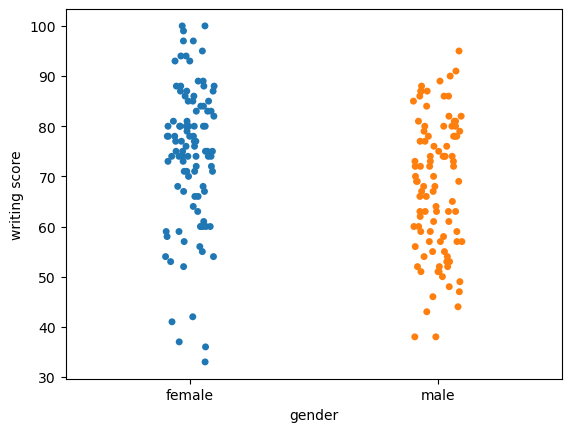

In [104]:
sns.stripplot(x=df['gender'],y=df['writing score'])

#### SWARM PLOT

<AxesSubplot:xlabel='math score'>

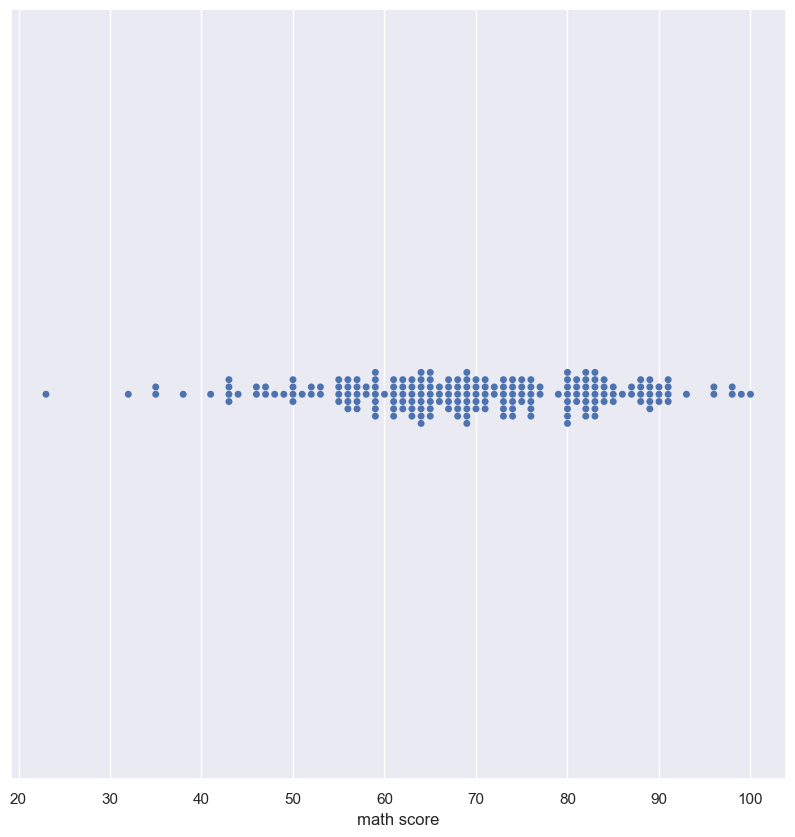

In [108]:
sns.set(rc={'figure.figsize':(10,10)})
sns.swarmplot(x=df['math score'])

<AxesSubplot:xlabel='reading score'>

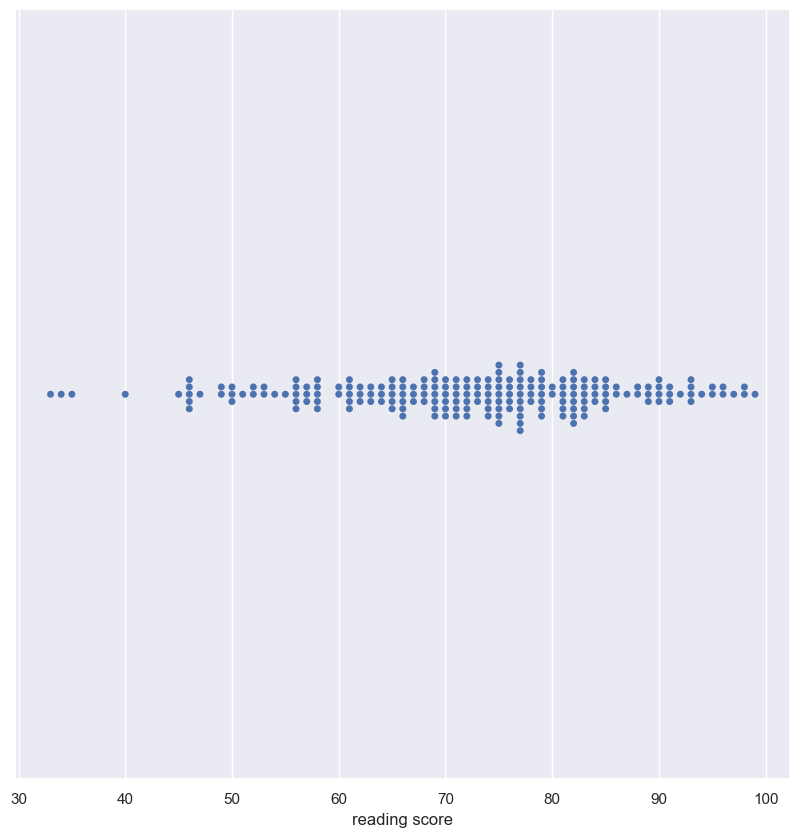

In [109]:
sns.set(rc={'figure.figsize':(10,10)})
sns.swarmplot(x=df['reading score'])

<AxesSubplot:xlabel='writing score'>

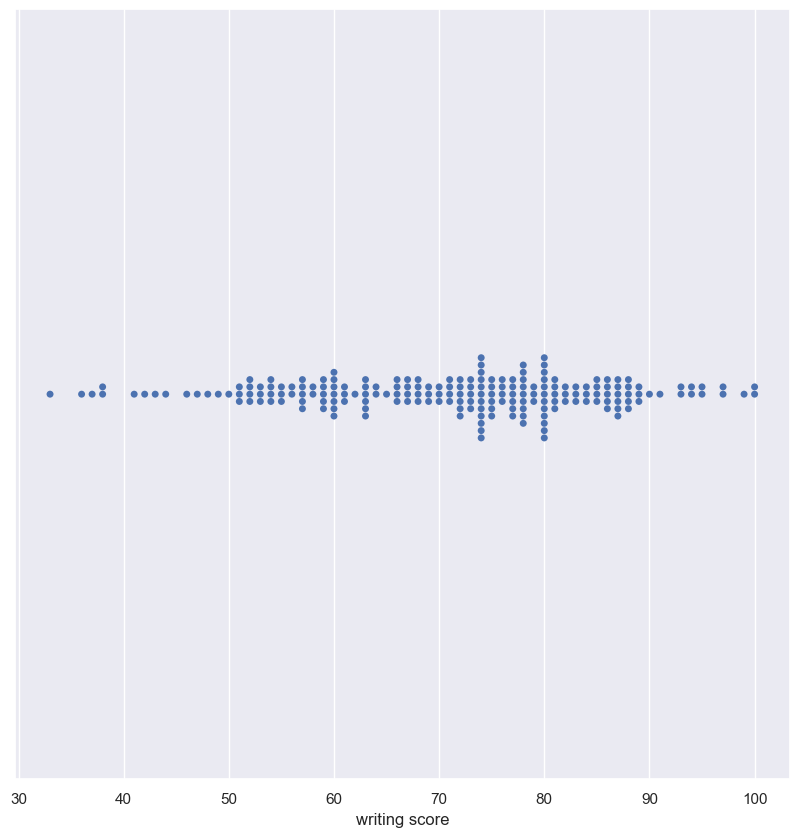

In [110]:
sns.set(rc={'figure.figsize':(10,10)})
sns.swarmplot(x=df['writing score'])

### HISTOGRAMS

(array([ 1.,  4.,  8., 13., 30., 48., 34., 33., 22.,  7.]),
 array([ 23. ,  30.7,  38.4,  46.1,  53.8,  61.5,  69.2,  76.9,  84.6,
         92.3, 100. ]),
 <BarContainer object of 10 artists>)

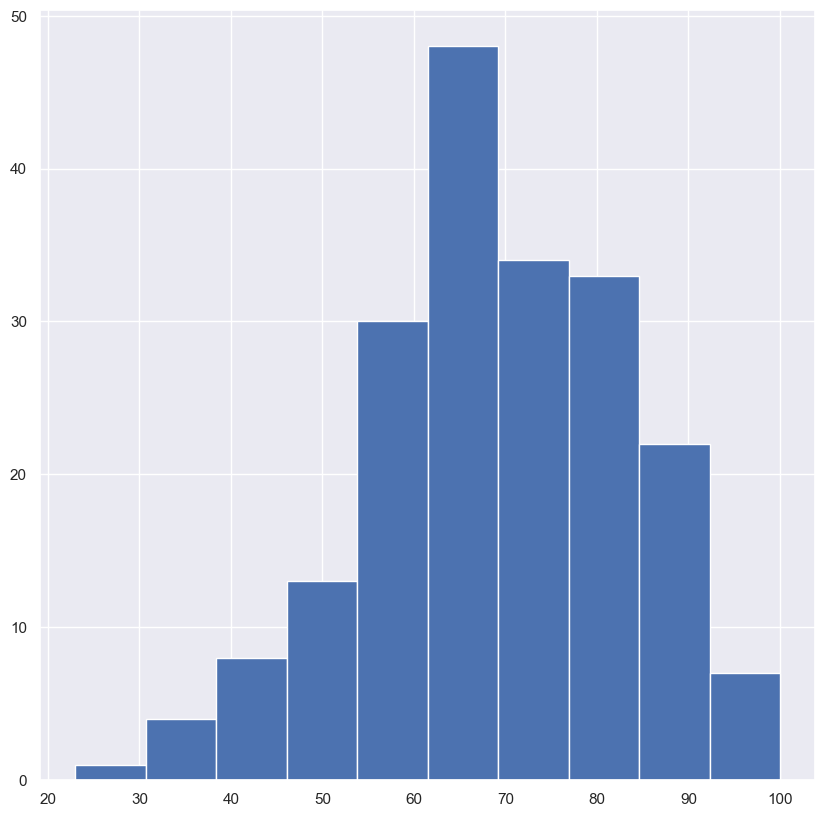

In [111]:
plt.hist(df['math score'])

(array([ 3.,  7.,  9., 17., 21., 38., 45., 31., 16., 13.]),
 array([33. , 39.6, 46.2, 52.8, 59.4, 66. , 72.6, 79.2, 85.8, 92.4, 99. ]),
 <BarContainer object of 10 artists>)

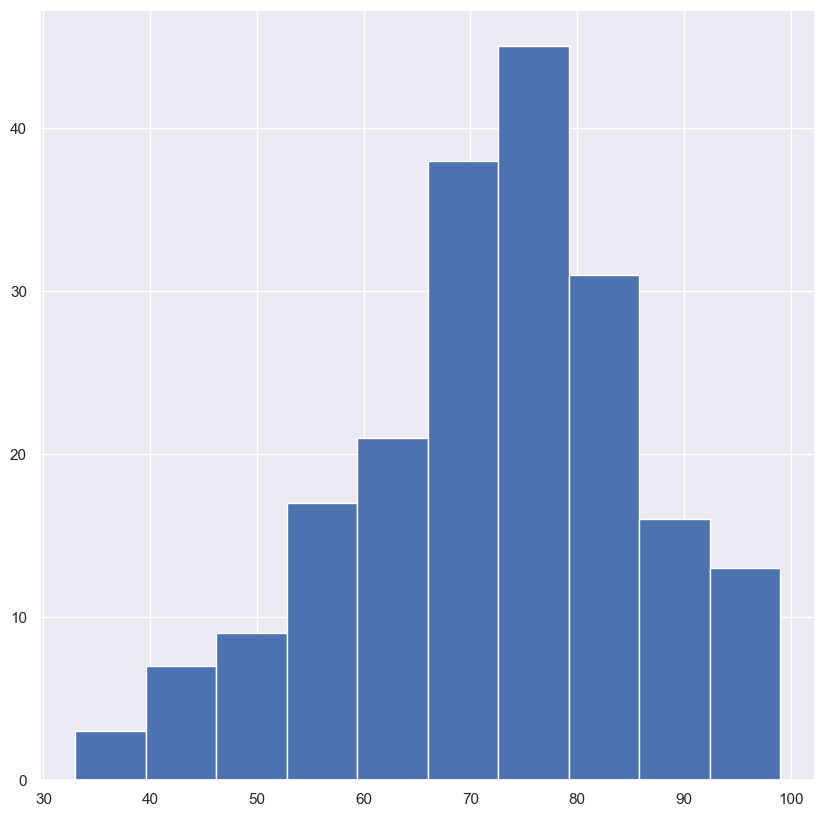

In [112]:
plt.hist(df['reading score'])

(array([ 5.,  5., 14., 21., 24., 29., 40., 35., 18.,  9.]),
 array([ 33. ,  39.7,  46.4,  53.1,  59.8,  66.5,  73.2,  79.9,  86.6,
         93.3, 100. ]),
 <BarContainer object of 10 artists>)

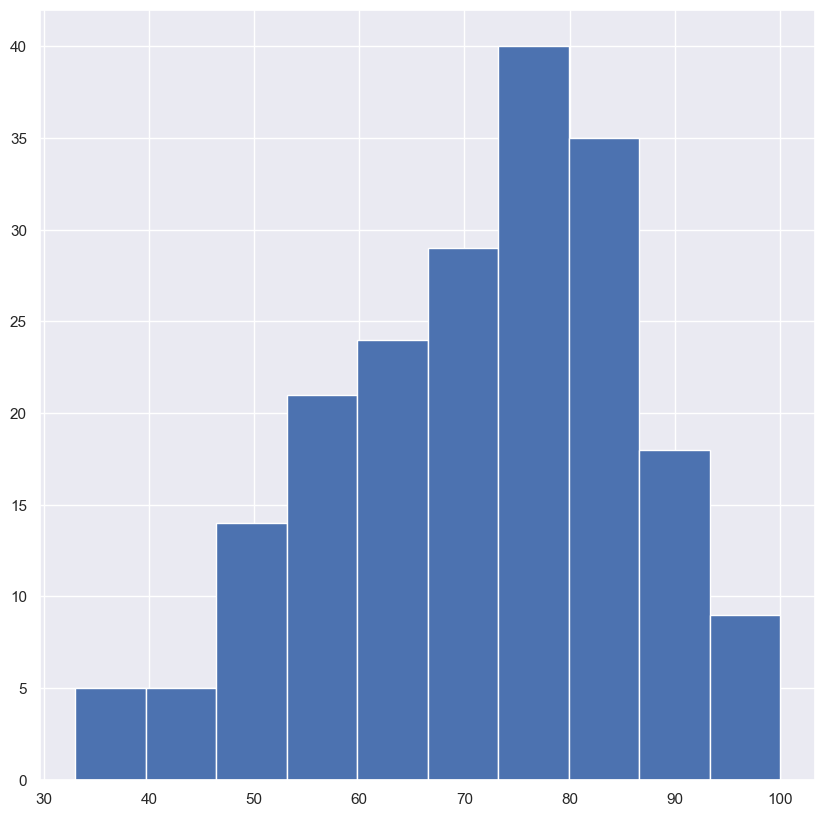

In [113]:
plt.hist(df['writing score'])

### DENSITY PLOT

<AxesSubplot:ylabel='Density'>

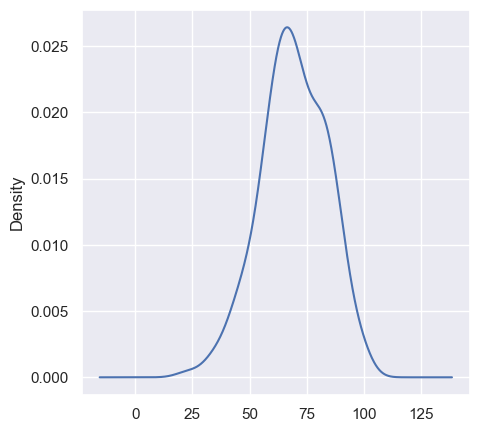

In [115]:
plt.figure(figsize=(5,5))
df['math score'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

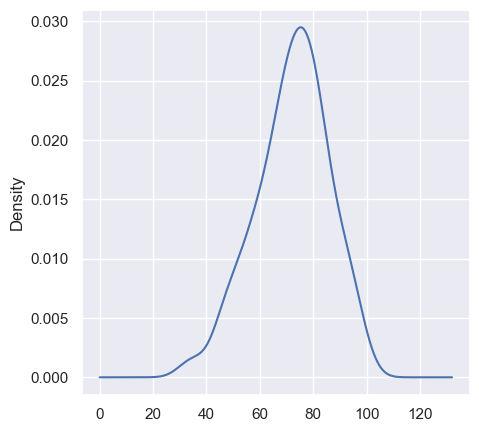

In [116]:
plt.figure(figsize=(5,5))
df['reading score'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

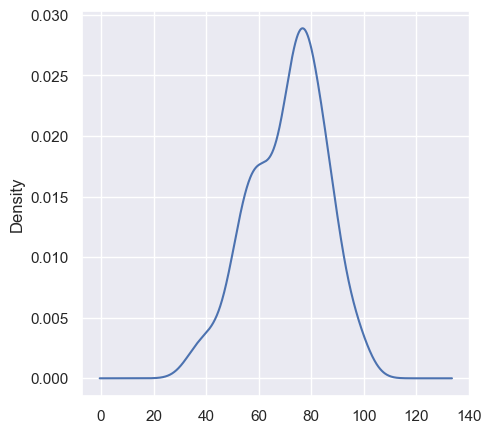

In [117]:
plt.figure(figsize=(5,5))
df['writing score'].plot(kind='density')

### BOXPLOT

{'whiskers': [<matplotlib.lines.Line2D at 0x2818926c610>,
 'caps': [<matplotlib.lines.Line2D at 0x2818926cbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2818926c340>],
 'medians': [<matplotlib.lines.Line2D at 0x28189277190>],
 'fliers': [<matplotlib.lines.Line2D at 0x28189277460>],
 'means': []}

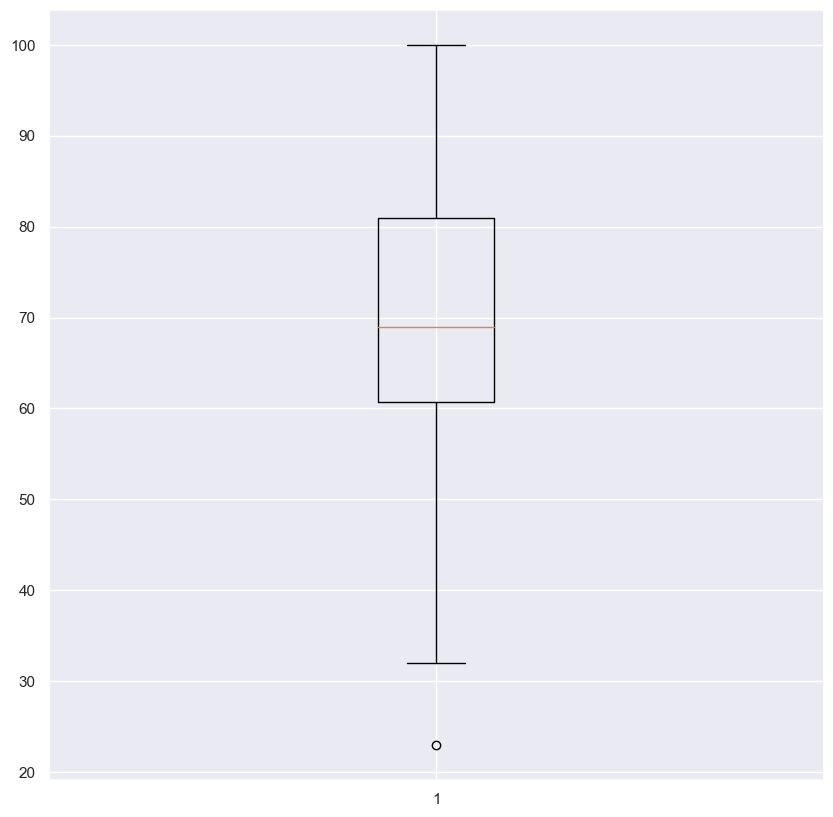

In [118]:
plt.boxplot(df['math score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x281892cd790>,
 'caps': [<matplotlib.lines.Line2D at 0x281892cdd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x281892cd4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x281892dd310>],
 'fliers': [<matplotlib.lines.Line2D at 0x281892dd5e0>],
 'means': []}

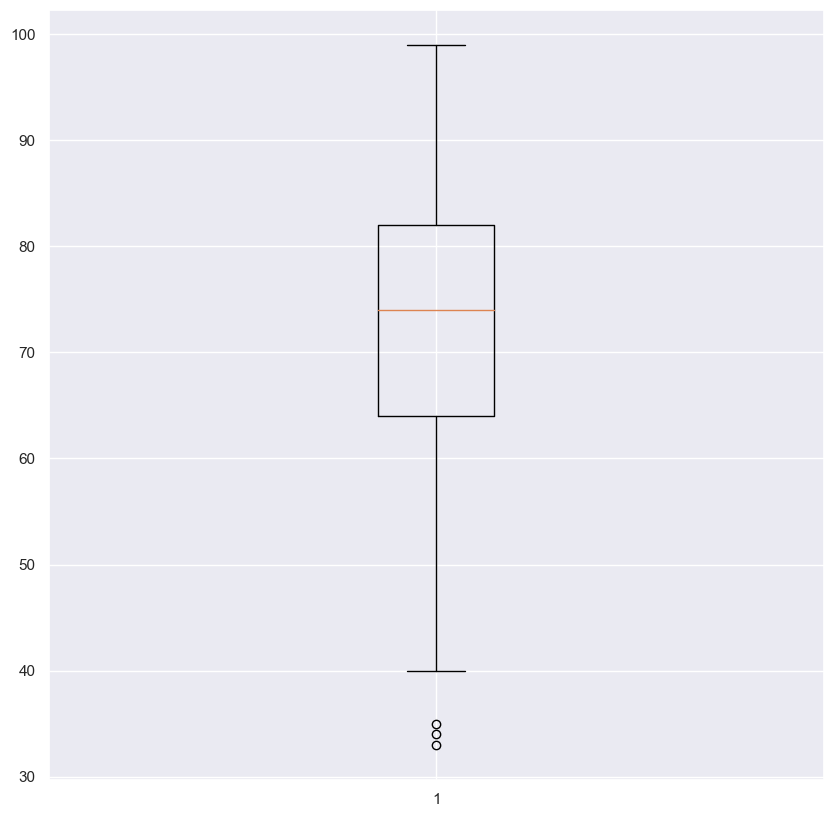

In [119]:
plt.boxplot(df['reading score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28189339190>,
 'caps': [<matplotlib.lines.Line2D at 0x28189339730>,
 'boxes': [<matplotlib.lines.Line2D at 0x2818932ce80>],
 'medians': [<matplotlib.lines.Line2D at 0x28189339d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x28189339fd0>],
 'means': []}

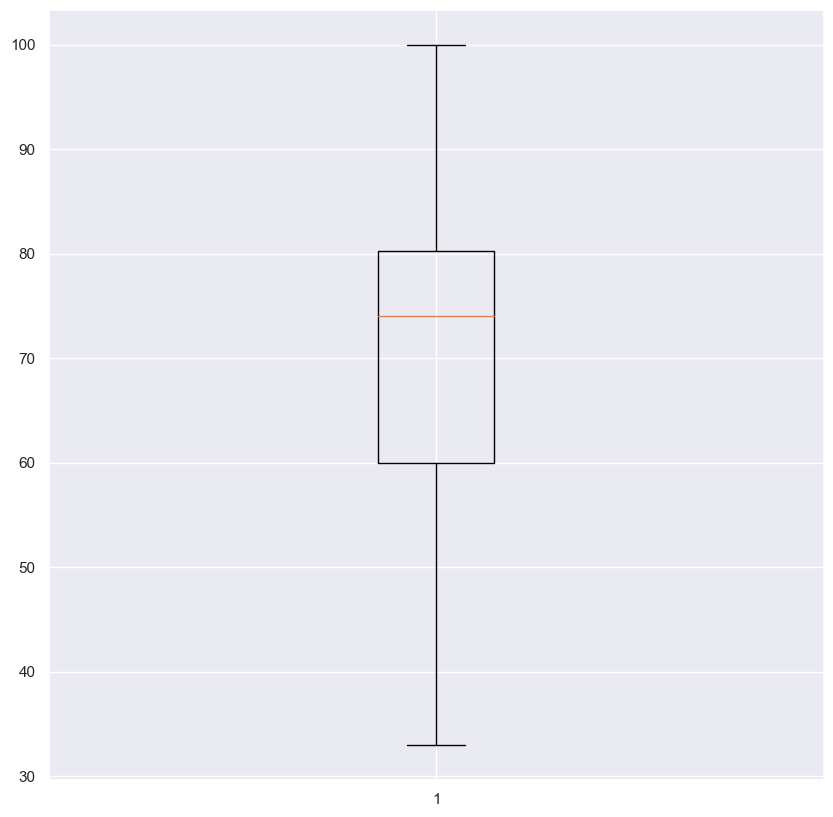

In [120]:
plt.boxplot(df['writing score'])

ValueError: Dimensions of labels and X must be compatible

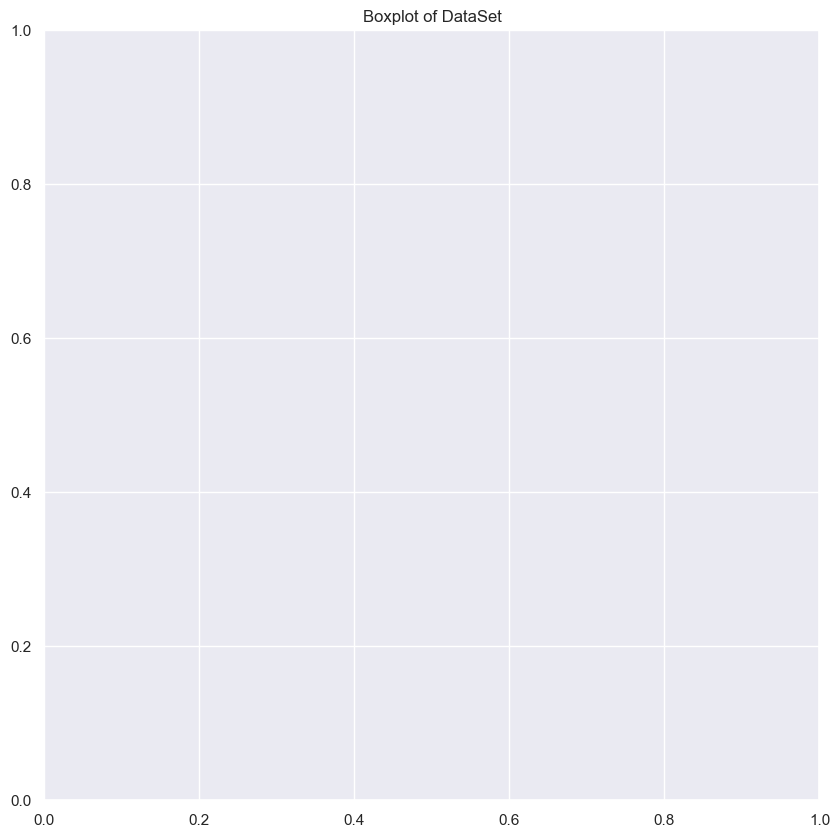

In [125]:
plt.figure(figsize=(10,10))
plt.title("Boxplot of DataSet")
plt.boxplot(df.values,labels=['math score','reading score','writing score'])

### HEATMAP

In [126]:
print(df.corr())

               math score  reading score  writing score
math score       1.000000       0.800794       0.769237
reading score    0.800794       1.000000       0.950655
writing score    0.769237       0.950655       1.000000


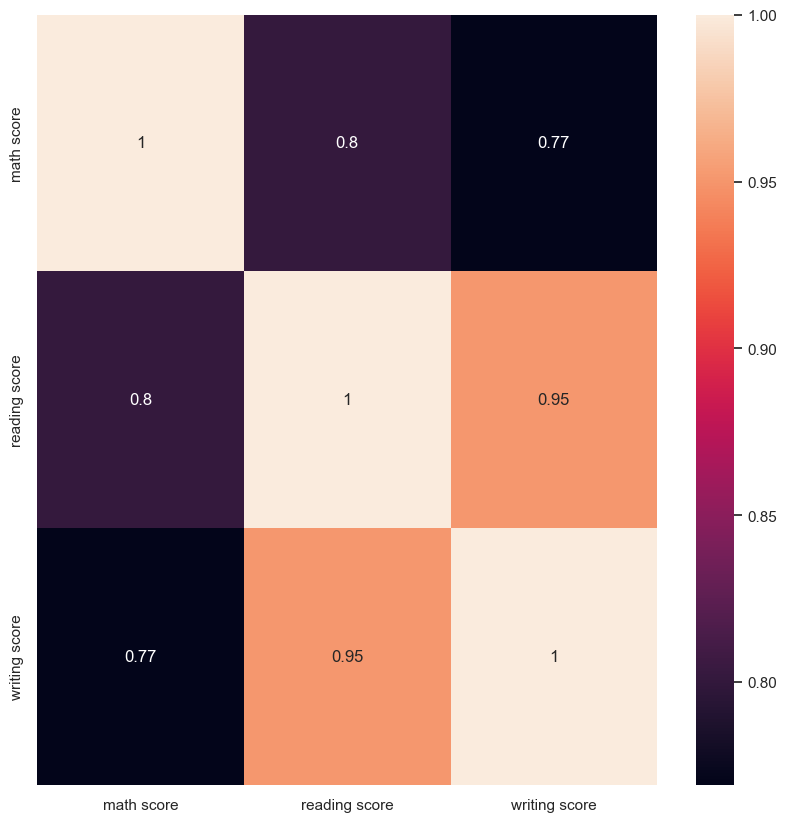

In [130]:
dataplot = sns.heatmap(df.corr(),annot=True)